#**Data Preprocessing**

##import library##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


##import dataset

In [2]:
df = pd.read_csv("concrete_data.csv")
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


shape of dataset

In [3]:
df.shape

(1030, 9)

information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##describe of dataset

In [5]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##Dataset column names

In [6]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

##check missing values

In [7]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

#**Exploratory Data Analysis**##

##Age column

In [8]:
df.age.unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1])

In [9]:
df.age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

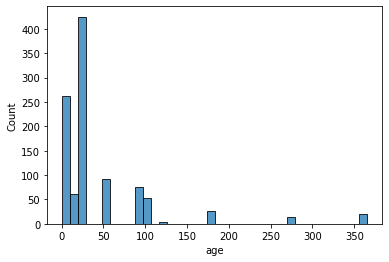

In [10]:
sns.histplot(df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


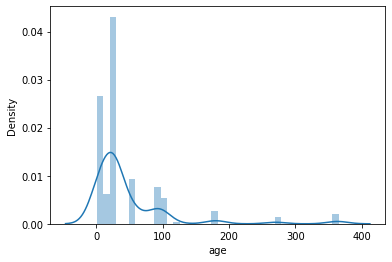

In [11]:
sns.distplot(df.age)

##cement column

In [12]:
df.cement

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: cement, Length: 1030, dtype: float64

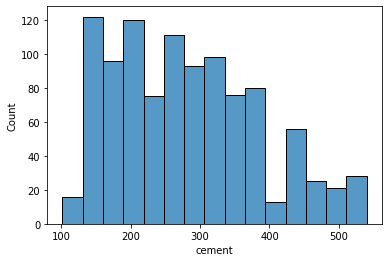

In [14]:
sns.histplot(df.cement)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


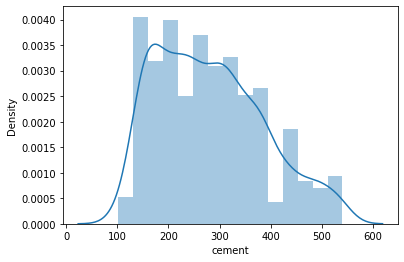

In [15]:
sns.distplot(df.cement)

##fly_ash column

In [16]:
df.fly_ash

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1025     90.3
1026    115.6
1027    108.6
1028      0.0
1029     78.3
Name: fly_ash, Length: 1030, dtype: float64

In [17]:
df.fly_ash.unique()

array([  0. ,  96.7,  94.6, 100.5, 125.4, 121.6, 118.3, 125.2, 163.3,
       163.8,  24.5, 118.2,  94.1,  95.7, 100.4, 124.8, 167. , 122. ,
       124.3,  96.2,  97.4,  95.6,  99.9,  98.8, 125.1, 121.4, 117.5,
       174.7, 174.2, 123.8, 121.9, 124.1,  59. ,  60. , 136. , 158. ,
       163. , 119. ,  95. , 120. , 143.6, 132.1, 118.6, 128.6, 172.4,
       173.5, 159.9,  79. ,  94. ,  97. , 123. , 132. , 141. ,  82. ,
       148. , 112. ,  89. , 139. , 111. , 175. , 116. , 100. , 184. ,
       130. , 107. ,  76. , 150. , 146. , 126. , 142. , 161. , 200. ,
       113. , 128. ,  86. ,  90. , 109. ,  78. ,  71. , 103. , 137. ,
       138. , 195. , 185. ,  92. , 143. , 134. , 133. , 166. ,  87. ,
       106. , 182. ,  91. , 179. ,  77. , 172. ,  98. , 164. , 152. ,
       194. , 193. , 190. , 187. ,  71.5, 106.7, 111.9, 103.3, 119.8,
       136.6, 137.9,  86.1, 194.9, 185.3,  89.6,  91.7, 142.7,  78.4,
       133.6, 132.6, 142.8, 165.7,  87.5, 113.2, 106.2, 182.1, 107.5,
       143.2, 178.9,

In [18]:
df.fly_ash.value_counts()

0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
71.0       1
138.0      1
166.0      1
182.0      1
143.2      1
Name: fly_ash, Length: 156, dtype: int64

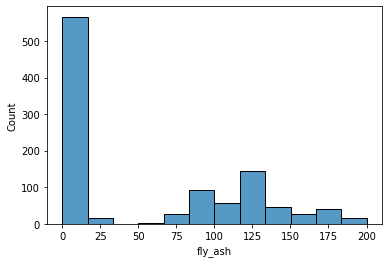

In [19]:
sns.histplot(df.fly_ash)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


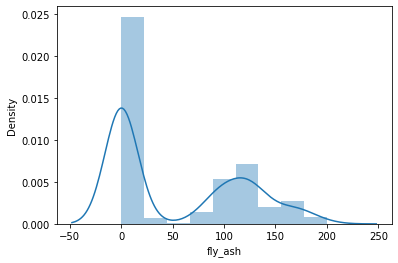

In [20]:
sns.distplot(df.fly_ash)

##age vs concrete_compressive_strength

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


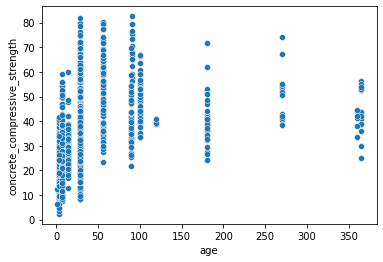

In [21]:
sns.scatterplot(df.age,df.concrete_compressive_strength)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


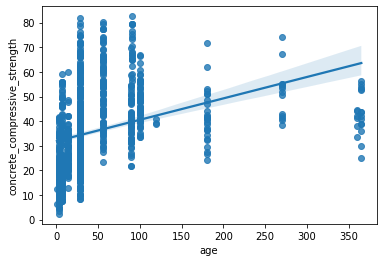

In [22]:
sns.regplot(df["age"], df["concrete_compressive_strength"])

##cement vs concrete_compressive_strength

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


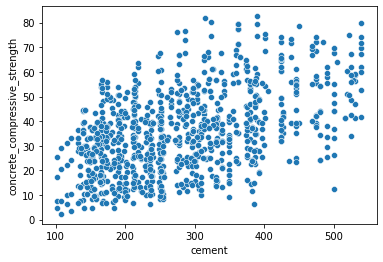

In [23]:
sns.scatterplot(df.cement,df.concrete_compressive_strength)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


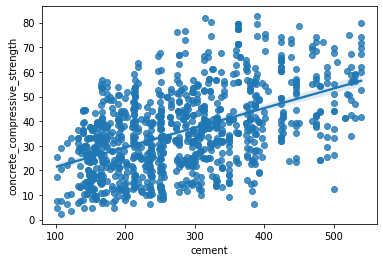

In [24]:
sns.regplot(df["cement"], df["concrete_compressive_strength"])

In [25]:
x = df.drop('concrete_compressive_strength', axis=True)
y = df['concrete_compressive_strength']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

#**creating model**

##Linear regression

In [27]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
pred = model.predict(x_test)
pred

array([39.54173004, 14.34766636, 61.33148723, 54.02870482, 24.44257981,
       53.63094459, 45.98973566, 27.31187439, 53.23177832, 37.08298577,
       16.75983422, 39.4324516 , 29.69334674, 35.87961914, 47.63884285,
       56.70862412, 35.79871479, 29.36308725, 48.69052196, 35.33194214,
       53.80404465, 32.10561488, 33.046423  , 48.23970516, 23.61819651,
       23.53591425, 69.42292047, 26.76815501, 56.70862412, 48.23338891,
       18.9707685 , 36.43996199, 17.42660579, 19.52438719, 24.61010586,
       15.2843709 , 53.18012778, 28.15463908, 27.19220514, 26.32272738,
       52.53006928, 30.42115481, 25.78127338, 35.57455811, 53.778552  ,
       53.99954893, 30.44100048, 44.14616464, 27.16386707, 57.07814289,
       36.70330382, 19.1206505 , 23.22652397, 34.65233159, 43.68926059,
       47.45581253, 35.93488017, 53.14095914, 59.97287158, 36.64413404,
       31.15430767, 20.63766861, 50.81476739, 55.59642861, 20.67748719,
       44.27233345, 33.26486213, 34.19218083, 19.36508085, 20.12

In [29]:
error = np.sqrt(metrics.mean_absolute_error(y_test,pred))
error

2.7894246535881715

In [30]:
print("R Score :",r2_score(pred,y_test))

R Score : 0.3815271164128736


##support vector regression

In [31]:
model1 = SVR(kernel = "linear")
model1.fit(x_train,y_train)

SVR(kernel='linear')

In [32]:
pred1 = model1.predict(x_test)
pred1

array([40.55475768, 13.38755467, 65.53455133, 57.81137909, 24.191034  ,
       52.10583323, 44.82381436, 26.24363445, 54.61702244, 41.45309823,
       15.7543891 , 41.55014719, 32.04862878, 36.7924686 , 48.64949269,
       58.60155842, 35.92406747, 32.20849273, 49.46244813, 36.67139709,
       57.43805503, 37.42517289, 32.79563151, 48.86493909, 23.02842683,
       23.58372881, 69.9702437 , 25.95491771, 58.60155842, 51.14393051,
       18.69054586, 38.43822159, 17.15338351, 18.38006318, 23.73526868,
       14.38378669, 51.5083242 , 28.37801962, 27.31749174, 27.06174862,
       54.79605936, 32.35256363, 24.58080512, 35.9580772 , 53.93849551,
       55.4804187 , 30.32137651, 45.23041983, 25.59996553, 68.35250772,
       36.57860934, 19.21858719, 21.76248298, 38.62122818, 46.71323983,
       50.0084772 , 35.31772873, 54.10506598, 63.39741342, 37.71788781,
       31.46538716, 21.21219694, 52.81727065, 56.5262426 , 20.69689819,
       43.77689965, 33.60701376, 33.20989671, 17.28249651, 18.92

In [33]:
error = np.sqrt(metrics.mean_absolute_error(y_test,pred1))
error

2.754437396216767

In [34]:
print("R Score :",r2_score(pred1,y_test))

R Score : 0.493310713630281
